# Attrition dataset

**importing packages**

In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

**loading dataset into program**

In [61]:
df = pd.read_csv('general_data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


**shape of dataset**

In [62]:
df.shape

(4410, 24)

**checking for null values**

In [63]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [64]:
#filling values for NumCompaniesWorked 
df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mean(),inplace=True)
#filling values for TotalWorkingYears
df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].mean(),inplace=True)

**checking if all value got filled or not**

In [65]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

**plotting histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA6C818388>,
      dtype=object)

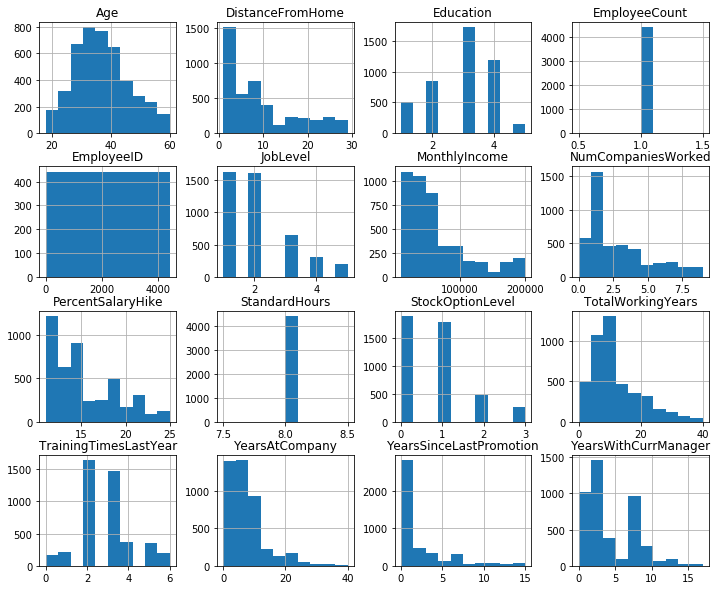

In [66]:
df.hist(figsize=(12,10))

**Inference from Histogram:**<br>
**.** Education, JobLevel, StockOptional Level are Categorical Variables which are in Encoded format<br>
**.** Standard Hours, Employee Count, Employee ID are irrelevent columns<br>

**dropping irrelevent columns from Dataset**

In [67]:
df.drop(['StandardHours','EmployeeCount','EmployeeID'],inplace=True,axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  Over18                   4410 non-null   object 
 14  PercentSalaryHike       

**plotting dist plot**

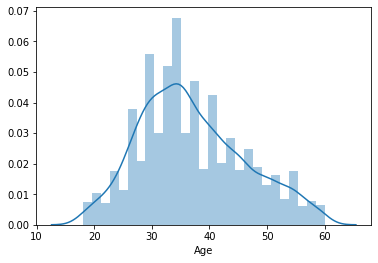

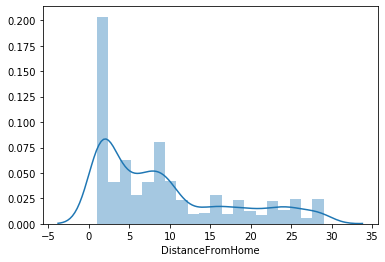

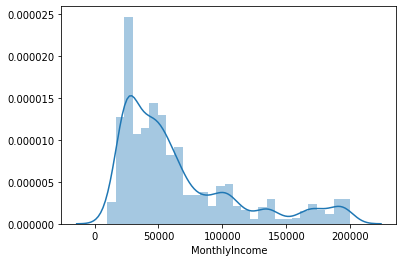

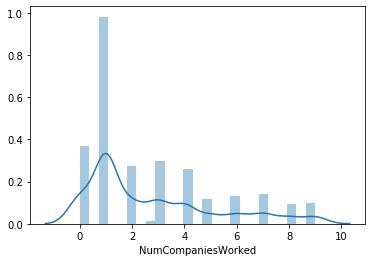

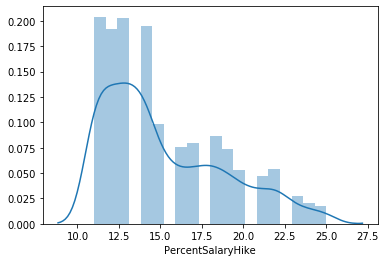

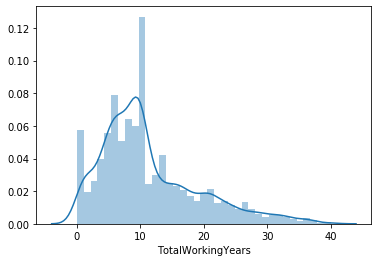

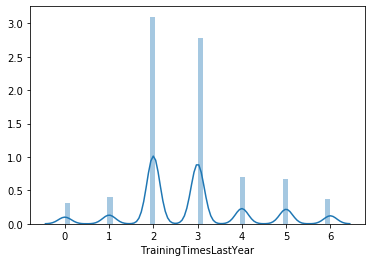

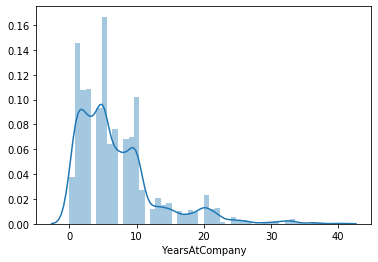

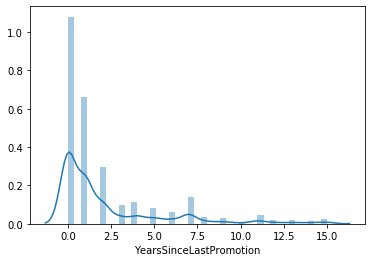

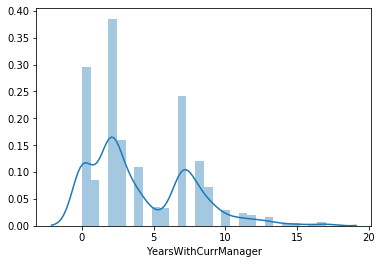

In [69]:
columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 
           'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in columns:
    sns.distplot(df[col])
    plt.show()

**Inference from Distplot**<br>
**.** Age, NumCompanies Worked, PercentSalaryHike, TotalWorking Years, YearsSinceLastPromotion is Unimodal<br>
**.** Distance from Home is Bimodal<br>
**.** Monthly Income, TrainingtimesLastYear, YearsAtCompany, YearswithCurrManager is Multimodal<br>

**converting text into catogorical format**

In [70]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df['Attrition'] = lab.fit_transform(df['Attrition'])
df['BusinessTravel'] = lab.fit_transform(df['BusinessTravel'])
df['Department'] = lab.fit_transform(df['Department'])
df['Over18'] = lab.fit_transform(df['Over18'])
df['MaritalStatus'] = lab.fit_transform(df['MaritalStatus'])
df['JobRole'] = lab.fit_transform(df['JobRole'])
df['Gender'] = lab.fit_transform(df['Gender'])
df['EducationField'] = lab.fit_transform(df['EducationField'])

In [71]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,...,131160,1.0,0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,...,41890,0.0,0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,...,193280,1.0,0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,...,83210,3.0,0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,...,23420,4.0,0,12,2,9.0,2,6,0,4


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   int32  
 3   Department               4410 non-null   int32  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int32  
 7   Gender                   4410 non-null   int32  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int32  
 10  MaritalStatus            4410 non-null   int32  
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  Over18                   4410 non-null   int32  
 14  PercentSalaryHike       

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   int32  
 3   Department               4410 non-null   int32  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int32  
 7   Gender                   4410 non-null   int32  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int32  
 10  MaritalStatus            4410 non-null   int32  
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  Over18                   4410 non-null   int32  
 14  PercentSalaryHike       

**spilting dataset**

In [73]:
y = df.iloc[:,1:2]
y.head()

,Attrition
0,0
1,1
2,0
3,0
4,0


In [74]:
x=x = df.drop(['Attrition'], axis=1)
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,0,12,2,9.0,2,6,0,4


**since dependent variable Attrition is binary categorical**<br>
**we use logistic regression for this dataset**

# logistic Regression

In [76]:
import statsmodels.api as sm

In [77]:
x1=sm.add_constant(x)
Logistic=sm.Logit(y,x1)
result=Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.393016
         Iterations 7


LinAlgError: Singular matrix

In [78]:
result.summary()

NameError: name 'result' is not defined

Optimization terminated successfully.
         Current function value: 0.393016
         Iterations 7


LinAlgError: Singular matrix

In [59]:
result.summary()

NameError: name 'result' is not defined